In [1]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook")

In [2]:

df_lsl = pd.read_csv('./lsl_results.csv')
df_lsl['timestamp'] = df_lsl['timestamp'] + df_lsl['offset']
df_lsl.drop(columns=['offset'], inplace=True)
df_lsl['timestamp_diff'] = df_lsl['timestamp'].diff().fillna(0)
df_lsl = df_lsl[df_lsl['timestamp'] > 2645]
# Drop last row
df_lsl = df_lsl[:-1]
print(df_lsl.shape)
df_lsl.head()



FileNotFoundError: [Errno 2] No such file or directory: './lsl_results.csv'

In [ ]:
df_sensor = pd.read_csv('./sensor_results.csv')
df_sensor = df_sensor[df_sensor['value'].str.lower() == 'a']
df_sensor['timestamp_diff'] = df_sensor['timestamp'].diff().fillna(0)
df_sensor = df_sensor[df_sensor['timestamp'] > 2645]
df_sensor = df_sensor[df_sensor['timestamp_diff'] > 0.05]
print(df_sensor.shape)
df_sensor.head()


(956, 3)


,timestamp,value,timestamp_diff
45,2645.065219,a,0.099994
46,2645.215253,A,0.150034
47,2645.315267,a,0.100013
48,2645.465150,A,0.149883
49,2645.565334,a,0.100184


<Axes: >

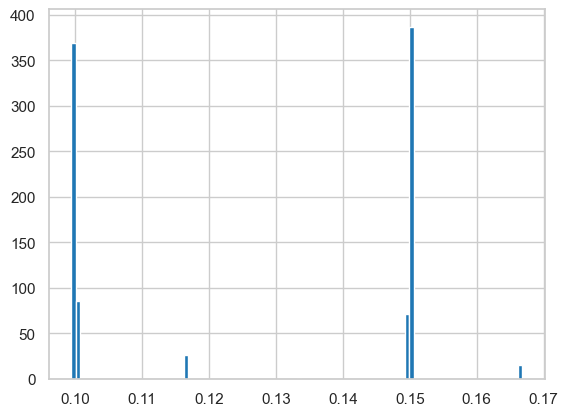

In [ ]:
df_sensor['timestamp_diff'].hist(bins=100)

In [ ]:
df_sensor.tail()

,timestamp,value,timestamp_diff
1002,2764.582846,A,0.150071
1003,2764.699423,a,0.116577
1004,2764.849657,A,0.150234
1005,2764.949554,a,0.099897
1006,2765.099603,A,0.150050


In [ ]:
df_lsl.tail()

,timestamp,value,timestamp_diff
994,2764.541573,A,0.150609
995,2764.642283,a,0.100709
996,2764.792894,A,0.150611
997,2764.893588,a,0.100694
998,2765.044185,A,0.150598


<Axes: ylabel='Count'>

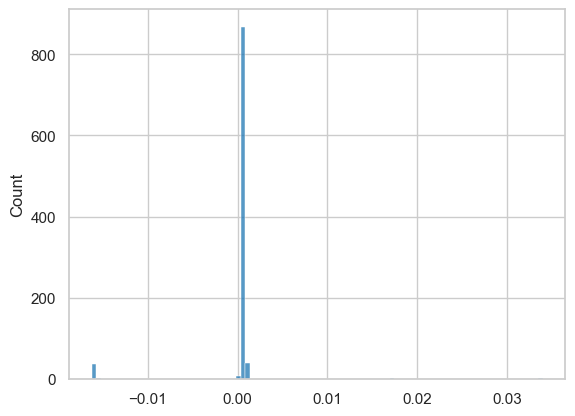

In [ ]:
delays = df_lsl['timestamp_diff'].to_numpy() - df_sensor['timestamp_diff'].to_numpy() 
sns.histplot(delays, bins=100)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyxdf

In [73]:
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test_run-001_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test_run-002_eeg.xdf'
fpath = './results/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-test-120_run-002_eeg.xdf'
streams, header = pyxdf.load_xdf(fpath)

for stream in streams:
    print(stream['info']['name'])

['SequenceStream']
['ScreenSensorStream']
['ScreenSequenceStream']


In [74]:
# Get sequence stream by name
sequence_stream = [s for s in streams if s['info']['name'][0] == 'SequenceStream'][0]
screen_sequence_stream = [s for s in streams if s['info']['name'][0] == 'ScreenSequenceStream'][0]
sensor_stream = [s for s in streams if s['info']['name'][0] == 'ScreenSensorStream'][0]

## Sequence jitter

In [75]:
timestamps = sequence_stream['time_stamps']
timestamps_diff = np.diff(timestamps)

In [76]:
timestamps_diff

array([0.10072126, 0.15056584, 0.10073296, 0.15059884, 0.10073136,
       0.15059514, 0.10075266, 0.15057894, 0.10074286, 0.15065254,
       0.10065796, 0.15061014, 0.10074656, 0.15056954, 0.10072066,
       0.15063594, 0.10072896, 0.15059974, 0.10072816, 0.15059584,
       0.10072946, 0.15058274, 0.10074646, 0.15057454, 0.10076526,
       0.15058724, 0.10072756, 0.15056914, 0.10075766, 0.15060954,
       0.10068946, 0.15063004, 0.10073216, 0.15059584, 0.10073226,
       0.15061014, 0.10068386, 0.15063604, 0.10072926, 0.15059874,
       0.10069626, 0.15060364, 0.10075686, 0.15059164, 0.10072936,
       0.15060434, 0.10073426, 0.15056314, 0.10079656, 0.15053244,
       0.10075306, 0.15059754, 0.10073406, 0.15057254, 0.10072726,
       0.15062864, 0.10073026, 0.15059804, 0.10072946, 0.15059904,
       0.10070316, 0.15060104, 0.10071866, 0.15060814, 0.10071906,
       0.15063854, 0.10072006, 0.15056794, 0.10077016, 0.15059864,
       0.10069366, 0.15062814, 0.10069636, 0.15061274, 0.10076

In [77]:
on_timestamps_diff = timestamps_diff[timestamps_diff < 0.13] - 0.1
off_timestamps_diff = timestamps_diff[timestamps_diff > 0.13] - 0.15
delays = np.concatenate((on_timestamps_diff, off_timestamps_diff))
print(delays.shape)

(191,)


Text(0.5, 0, 'Delay (ms)')

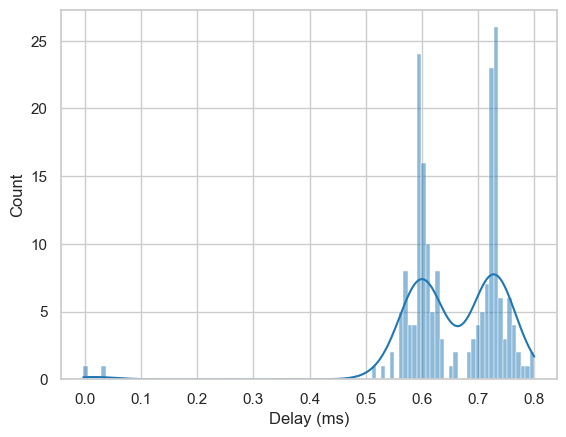

In [78]:
sns.histplot(delays * 1000, bins=100, kde=True)
plt.xlabel('Delay (ms)')

# Sensor jitter

Text(0.5, 0, 'Sensor Delay (ms)')

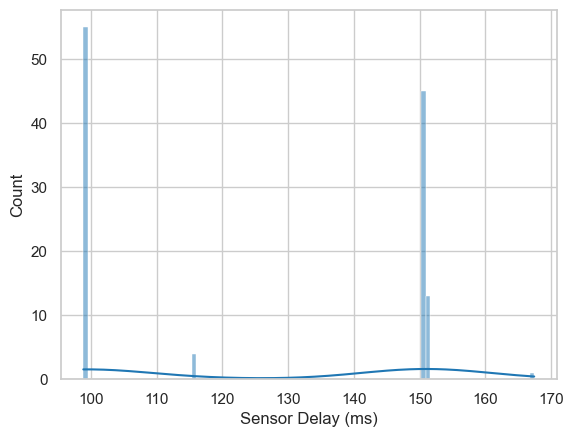

In [79]:
timestamps = sensor_stream['time_stamps']
timeseries = sensor_stream['time_series']

# Get timestamps within sequence stream time range
timestamps = timestamps[(timestamps > sequence_stream['time_stamps'][0]) & (timestamps < sequence_stream['time_stamps'][-1])]

timestamps_diff = np.diff(timestamps)
# Remove first 10 and last 10 samples
timestamps_diff = timestamps_diff[10:-10]

sns.histplot(timestamps_diff * 1000, bins=100, kde=True)
plt.xlabel('Sensor Delay (ms)')

In [80]:
timestamps_diff

array([0.11563756, 0.15096128, 0.09917565, 0.15089008, 0.09917635,
       0.15094678, 0.09912485, 0.15098158, 0.09893175, 0.15091718,
       0.09939845, 0.15067928, 0.09919715, 0.15094558, 0.09912565,
       0.15097288, 0.09892335, 0.15097028, 0.09915255, 0.15089938,
       0.09915105, 0.15097398, 0.09887005, 0.15124958, 0.09887525,
       0.15100878, 0.11564166, 0.15099728, 0.09916975, 0.15093338,
       0.09909425, 0.15087118, 0.09940855, 0.15069528, 0.09915195,
       0.15072098, 0.09940025, 0.15077008, 0.09893795, 0.15121248,
       0.09890995, 0.15092488, 0.09940995, 0.15074958, 0.09935115,
       0.15067678, 0.09889875, 0.15117398, 0.09914055, 0.15100318,
       0.09912195, 0.15090308, 0.11587296, 0.15064798, 0.09915415,
       0.15094568, 0.09915345, 0.15089608, 0.09912905, 0.15090218,
       0.09937315, 0.15062728, 0.09907005, 0.15089808, 0.09912895,
       0.15083788, 0.09929985, 0.15089938, 0.09912225, 0.15105518,
       0.09894925, 0.15107418, 0.09912635, 0.15061868, 0.09940

In [1]:
import pyglet
from ctypes import c_int, byref

max_samples = c_int()
pyglet.gl.glGetIntegerv(pyglet.gl.GL_MAX_SAMPLES, byref(max_samples))

print(f"maximum samples: {max_samples.value}")

maximum samples: 64
